## GSE22058-GPL10457 part 1 (human hepatocellular carcinoma, normalized series matrix)
The script allows to pre-process **GSE22058-GPL10457** normalized series matrix acquired from GEO data base. 
<br>
<br>
**GSE22058-GPL10457** data set consists of **192 samples**:

* 96 positive samples,
* and 96 negative samples (adjacent to the positive).
<br>

**For detailed information please refer to:** https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE22058
<br>

**Related publication:**
<br>
Burchard J, Zhang C, Liu AM, Poon RT et al. *microRNA-122 as a regulator of mitochondrial metabolic gene network in hepatocellular carcinoma.* Mol Syst Biol 2010 Aug 24;6:402. (DOI: 10.1038/msb.2010.58)

**Before you start:**
* The code is writen in **R**.
* **Download** and unzip series matrix first: https://ftp.ncbi.nlm.nih.gov/geo/series/GSE22nnn/GSE22058/matrix/GSE22058-GPL10457_series_matrix.txt.gz
* **Required libraries**: *GEOquery*, *repr*

The code is written by @MelaniaNowicka, Free University of Berlin (contact: melania.nowicka@gmail.com).

**Import necessary libraries**

In [1]:
# read the necessary libraries
library("GEOquery")
library("repr")

# read utility functions
source("utility-functions.R")

Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min

Welcome to Bioconductor

    Vignettes contain introductory material; view with


**Read GEO data from series matrix using getGEO()**

In [2]:
# get the data from series matrix using getGEO()
print("Reading data...")
data <- getGEO(filename="GSE22058-GPL10457_series_matrix.txt")

[1] "Reading data..."


Parsed with column specification:
cols(
  .default = col_double()
)
See spec(...) for full column specifications.
File stored at: 
C:\Users\melan\AppData\Local\Temp\RtmpIjNnDP/GPL10457.soft


**Extract count matrix**

In [3]:
# get count.matrix
count.matrix <- exprs(object = data)
# show matrix
head(count.matrix)

,GSM548041,GSM548042,GSM548043,GSM548044,GSM548045,GSM548046,GSM548047,GSM548048,GSM548049,GSM548050,...,GSM548225,GSM548226,GSM548227,GSM548228,GSM548229,GSM548230,GSM548231,GSM548232,GSM548338,GSM548339
10007626745,1.9607,2.1860,1.9819,2.1915,2.1791,2.2737,2.1655,2.1323,1.5856,2.2068,...,2.2525,2.2712,2.0683,2.3304,2.1395,2.1596,2.1884,2.0834,2.4895,2.0356
10007626746,2.0020,2.1110,2.1027,2.1080,2.0318,2.0104,2.1366,2.0735,1.0745,2.1514,...,1.8837,2.1585,2.0260,2.2497,1.9321,1.9829,2.0447,1.9831,1.9765,2.1801
10007626747,1.6236,1.8772,1.5299,1.9446,1.6654,1.8981,1.7645,1.8247,0.7856,1.8766,...,1.7528,1.9306,1.6955,2.0200,1.7532,1.8138,1.8769,1.8315,1.6587,1.7522
10007626748,1.7582,2.0204,1.6981,1.9322,1.9425,2.0261,1.8811,1.8523,1.3351,1.9446,...,2.0330,1.9940,1.9274,2.0370,1.8838,1.8859,1.9696,1.9107,2.3102,1.8118
10007626749,1.7438,1.9329,1.7891,1.8191,1.8986,1.9377,1.8625,1.9132,1.2624,1.9670,...,1.7455,1.7835,1.8710,2.0403,1.7707,1.8760,1.8882,1.8431,1.9471,1.5674
10007626750,2.1072,2.2413,2.0450,2.0943,2.1185,2.3039,2.1056,2.2299,1.4047,2.0062,...,2.2753,2.0960,2.3299,2.1817,2.2899,2.3194,2.3676,1.9824,2.4871,1.7340


**Extract important information about samples and miRNAs**

In [4]:
# set miRNA names to miRNA IDs
rownames(count.matrix) <- data@featureData@data$miRNA_ID
# count features and samples
original.data.row.numb <- nrow(count.matrix)
print(paste("Number of samples: ", ncol(count.matrix)))
print(paste("Number of features: ", original.data.row.numb))
# show matrix
head(count.matrix)

[1] "Number of samples:  192"
[1] "Number of features:  220"


,GSM548041,GSM548042,GSM548043,GSM548044,GSM548045,GSM548046,GSM548047,GSM548048,GSM548049,GSM548050,...,GSM548225,GSM548226,GSM548227,GSM548228,GSM548229,GSM548230,GSM548231,GSM548232,GSM548338,GSM548339
hsa-let-7a,1.9607,2.1860,1.9819,2.1915,2.1791,2.2737,2.1655,2.1323,1.5856,2.2068,...,2.2525,2.2712,2.0683,2.3304,2.1395,2.1596,2.1884,2.0834,2.4895,2.0356
hsa-let-7b,2.0020,2.1110,2.1027,2.1080,2.0318,2.0104,2.1366,2.0735,1.0745,2.1514,...,1.8837,2.1585,2.0260,2.2497,1.9321,1.9829,2.0447,1.9831,1.9765,2.1801
hsa-let-7c,1.6236,1.8772,1.5299,1.9446,1.6654,1.8981,1.7645,1.8247,0.7856,1.8766,...,1.7528,1.9306,1.6955,2.0200,1.7532,1.8138,1.8769,1.8315,1.6587,1.7522
hsa-let-7d,1.7582,2.0204,1.6981,1.9322,1.9425,2.0261,1.8811,1.8523,1.3351,1.9446,...,2.0330,1.9940,1.9274,2.0370,1.8838,1.8859,1.9696,1.9107,2.3102,1.8118
hsa-let-7e,1.7438,1.9329,1.7891,1.8191,1.8986,1.9377,1.8625,1.9132,1.2624,1.9670,...,1.7455,1.7835,1.8710,2.0403,1.7707,1.8760,1.8882,1.8431,1.9471,1.5674
hsa-let-7f,2.1072,2.2413,2.0450,2.0943,2.1185,2.3039,2.1056,2.2299,1.4047,2.0062,...,2.2753,2.0960,2.3299,2.1817,2.2899,2.3194,2.3676,1.9824,2.4871,1.7340


**Show information about sample source**

In [5]:
print("Classes in the series matrix: ")
samples <- as.data.frame(table(data@phenoData@data$characteristics_ch1.1))
colnames(samples) <- c("Sample source", "Frequency")
samples

[1] "Classes in the series matrix: "


Sample source,Frequency
tissue: adjacent liver non-tumor,96
tissue: liver tumor,96


**Prepare annotation**

In [6]:
# get annotation
annotation <- data@phenoData@data$characteristics_ch1.1
annotation <-as.numeric(factor(annotation))
annotation[annotation == 1] <- 0
annotation[annotation == 2] <- 1

**Separate negative and positive samples**

In [7]:
# move negative samples first, positive samples next
count.matrix.neg <- count.matrix[,which(annotation %in% c(0))]
print(paste("Number of negative samples: ", ncol(count.matrix.neg)))
count.matrix.pos <- count.matrix[,which(annotation %in% c(1))]
print(paste("Number of positive samples: ", ncol(count.matrix.pos)))
count.matrix <- cbind(count.matrix.neg, count.matrix.pos)

[1] "Number of negative samples:  96"
[1] "Number of positive samples:  96"


**Show boxplot for all samples**

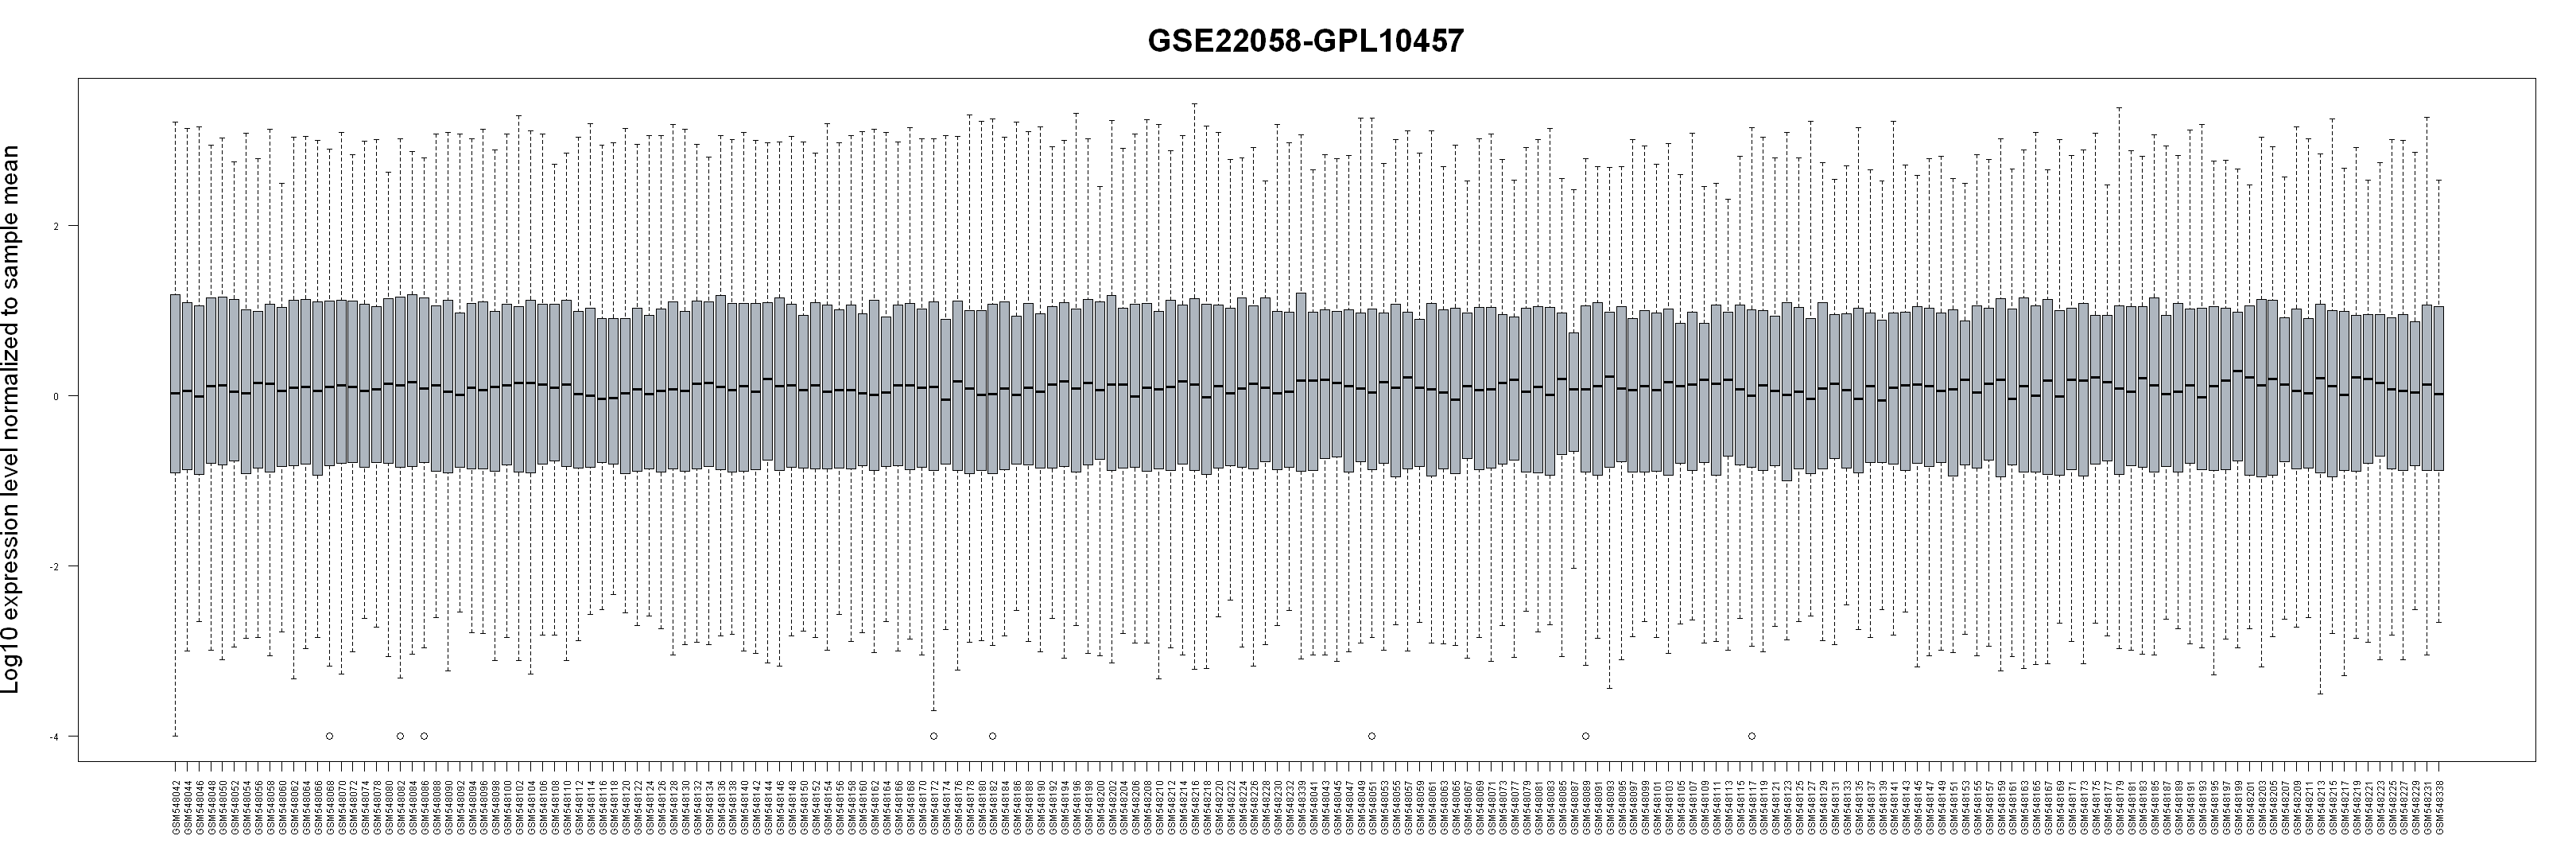

In [8]:
# show boxplot
#jpeg(file="GSE22058_all.jpeg", width=1500, height=500)
options(repr.plot.width=27, repr.plot.height=9)
boxplot(count.matrix, col = "#AEB6BF", cex.main=2, cex.lab=1.5, cex.axis=0.6, las = 2, main="GSE22058-GPL10457", ylab="Log10 expression level normalized to sample mean")
#dev.off()

**Show boxplots for positive and negative samples separately**

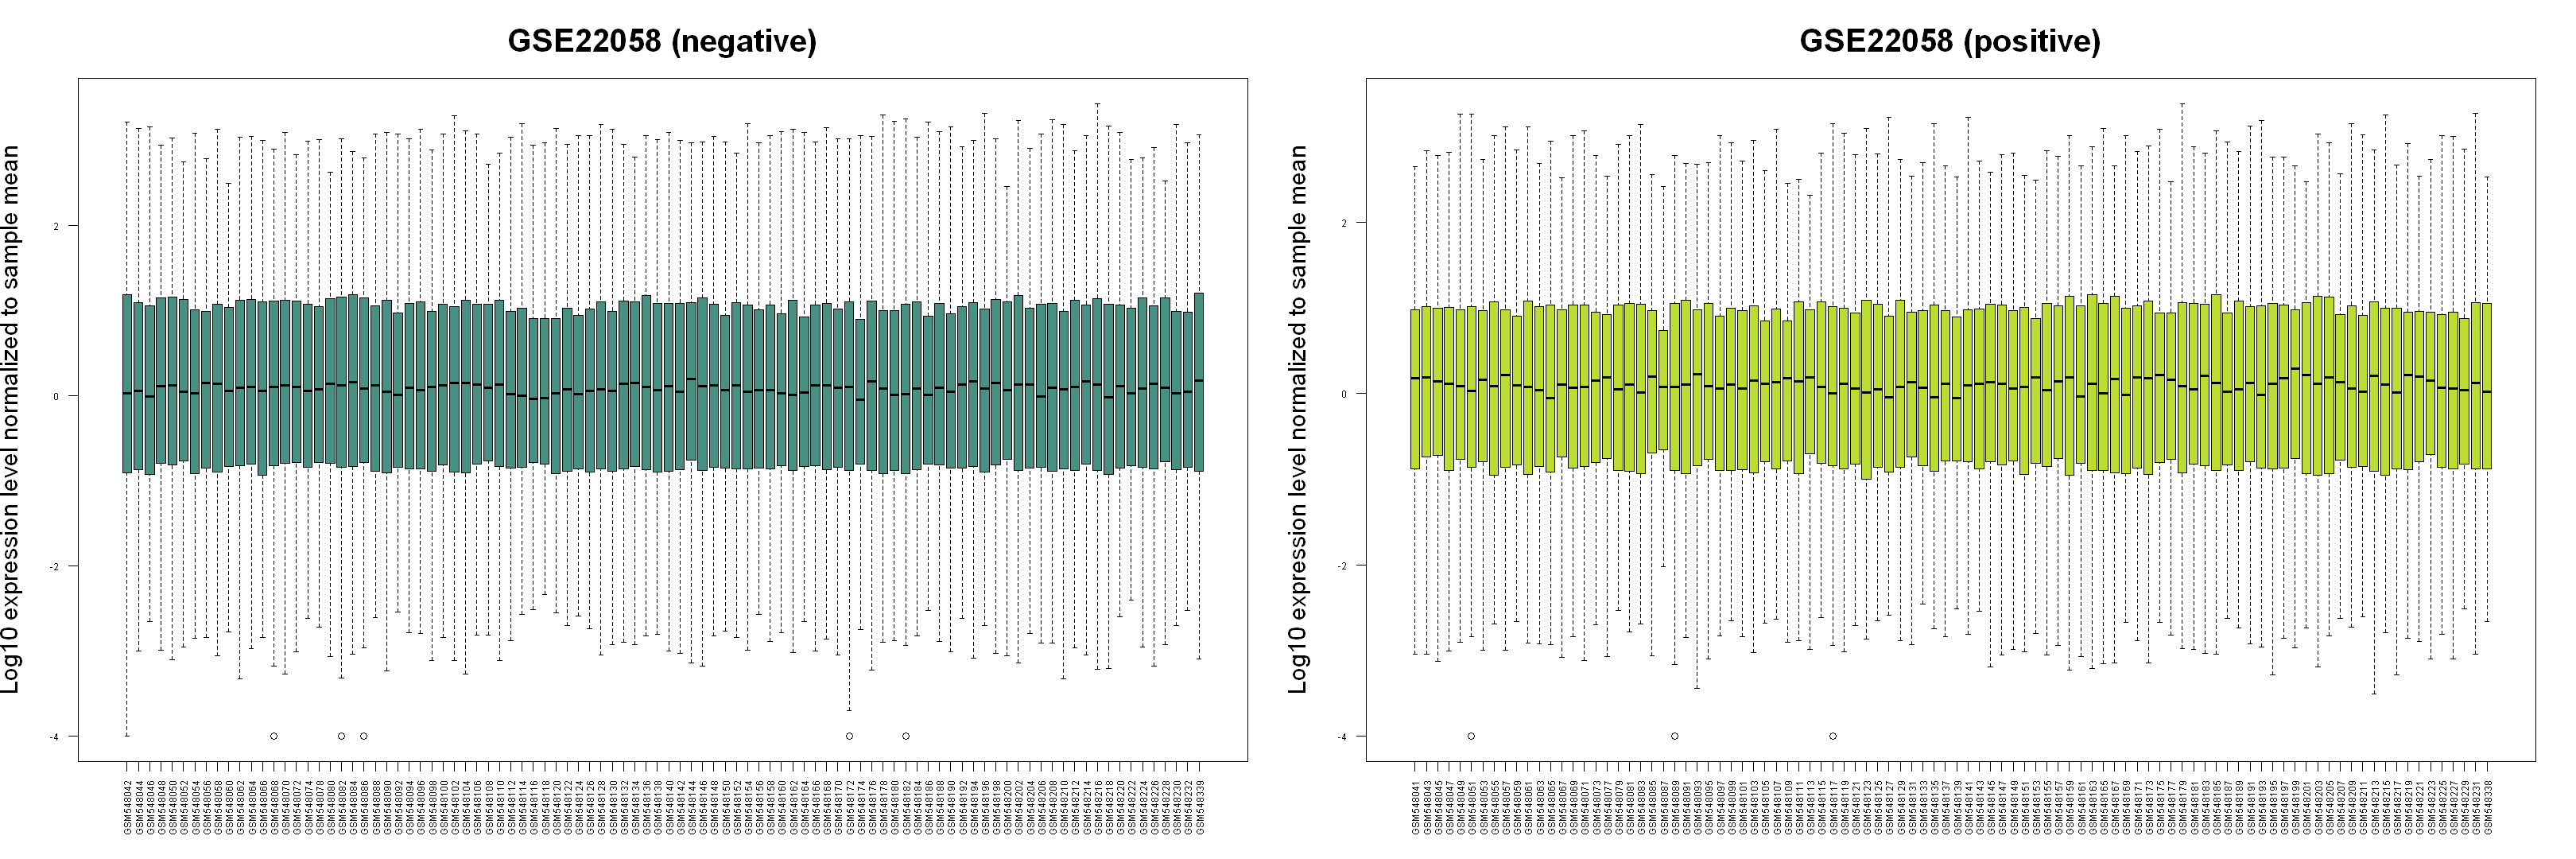

In [9]:
# show boxplot
#jpeg(file="GSE22058_pos_neg.jpeg", width=1500, height=500)
options(repr.plot.width=27, repr.plot.height=9)
lmts <- range(count.matrix.neg, count.matrix.pos)
par(mfrow = c(1, 2))
boxplot(count.matrix.neg, col = "#217867d2", cex.main=2, cex.lab=1.5, cex.axis=0.6, las = 2, main="GSE22058 (negative)", ylab="Log10 expression level normalized to sample mean")
boxplot(count.matrix.pos, col = "#aad400cd", cex.main=2, cex.lab=1.5, cex.axis=0.6, las = 2, main="GSE22058 (positive)", ylab="Log10 expression level normalized to sample mean")
#dev.off()

**Filter samples after the normalization**

* Calculate 25% and 75% quantiles across all values in the data set

In [10]:
#calculate qlobal quantiles accross all the data points
GSE22058_quantile_global <- quantile(as.vector(as.matrix(count.matrix)))
q25 <- GSE22058_quantile_global["25%"]
print(paste("25% q: ", q25))
q75 <- GSE22058_quantile_global["75%"]
print(paste("75% q: ", q75))

[1] "25% q:  -0.851825"
[1] "75% q:  1.025825"


* Remove all samples of which the 50% quantile does not lie between 25% and 75% quantiles for the whole data set
* Remove adjacent samples to those that were filtered (do not leave unpaired samples in the data set)

In [11]:
# calculate column (sample) quantiles
GSE22058_quantile_column <- apply(count.matrix, 2, quantile)

# find samples that do not meet the quality criterion
quantile_filtering <- GSE22058_quantile_column["50%",] >= q25 & GSE22058_quantile_column["50%",] <= q75

# remove paired samples - if one af the pair does not go through the quality control, the paired negative
# or positive sample is removed too
if (length(quantile_filtering) != 0) {
    for (i in 1:length(quantile_filtering)) {
      if (i<=96) {
        if (quantile_filtering[i] == FALSE){
          #print(colnames(count.matrix)[i])
          quantile_filtering[i+96] <- FALSE
          print(paste("REMOVE ", i, " and ", i+78))
        }
      }
      if (i>=97) {
        if (quantile_filtering[i] == FALSE){
          #print(colnames(count.matrix)[i])
          quantile_filtering[i-96] <- FALSE
        }
      }
    }
}

print(paste("Number of samples before quality control: ", ncol(count.matrix)))
count.matrix.f <- count.matrix[, quantile_filtering]
print(paste("Number of samples before quality control: ", ncol(count.matrix.f)))

[1] "Number of samples before quality control:  192"
[1] "Number of samples before quality control:  192"


In [12]:
if (length(quantile_filtering) != 0) {
    
    # counting removed samples in positive and negative class
    quantile_filtering_neg <- quantile_filtering[1:96]
    count_neg_removed <- sum(quantile_filtering_neg==FALSE)
    quantile_filtering_pos <- quantile_filtering[97:192]
    count_pos_removed <- sum(quantile_filtering_pos==FALSE)

    # removal from the separate negative sample and positive sample count matrix
    count.matrix.neg.f <- count.matrix.neg[, quantile_filtering_neg]
    count.matrix.pos.f <- count.matrix.pos[, quantile_filtering_pos]

    #assign annotation
    neg_samples <- 96 - count_neg_removed
    pos_samples <- 96 - count_pos_removed
    annotationneg <- rep(0,neg_samples)
    annotationpos <- rep(1,pos_samples)
    annotation <- c(annotationneg, annotationpos)
} else {
    count.matrix.neg.f <- count.matrix.neg
    count.matrix.pos.f <- count.matrix.pos
}

**Show boxplot for all samples after filtering**

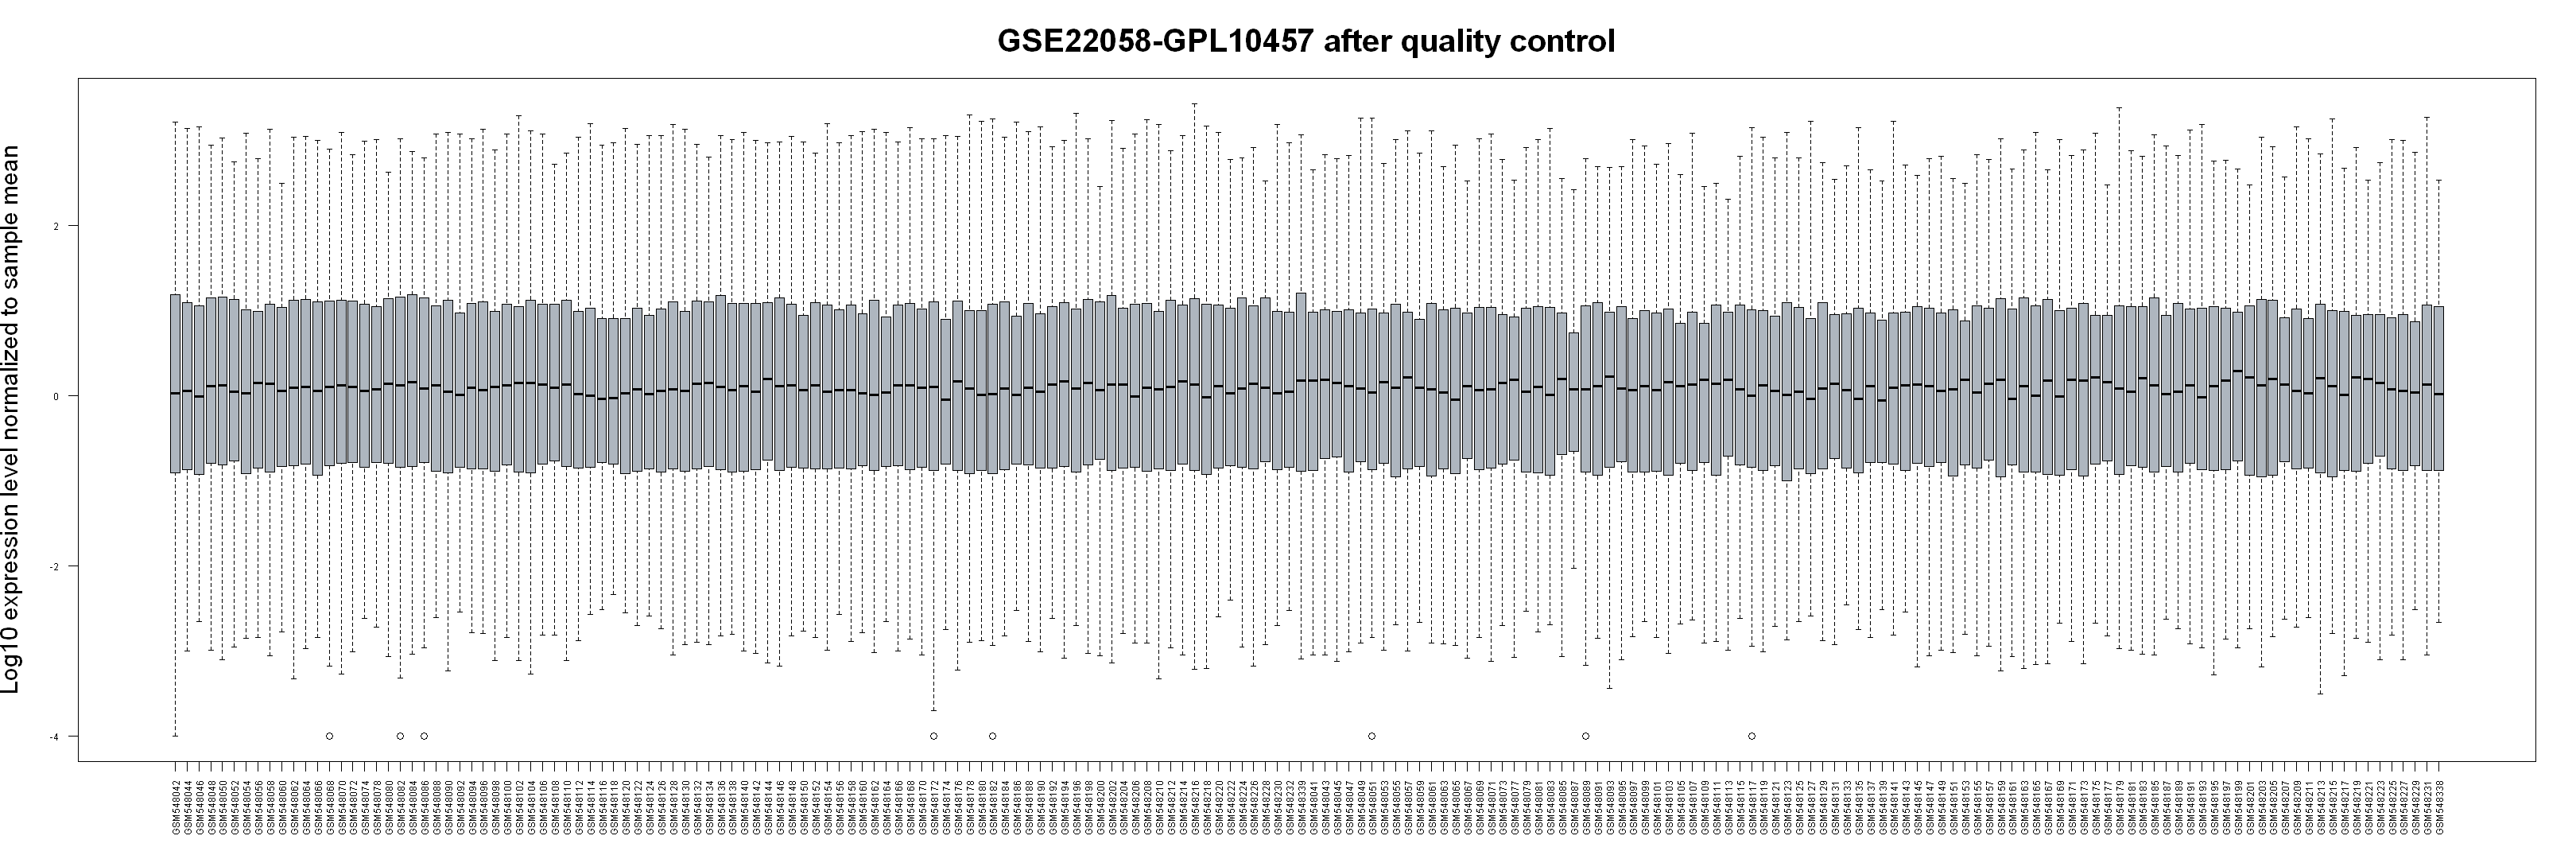

In [13]:
# show boxplot
#jpeg(file="GSE22058_all.jpeg", width=1500, height=500)
options(repr.plot.width=27, repr.plot.height=9)
boxplot(count.matrix.f, col = "#AEB6BF", cex.main=2, cex.lab=1.5, cex.axis=0.6, las = 2, main="GSE22058-GPL10457 after quality control", ylab="Log10 expression level normalized to sample mean")
#dev.off()

**Show boxplots for positive and negative samples separately after filtering**

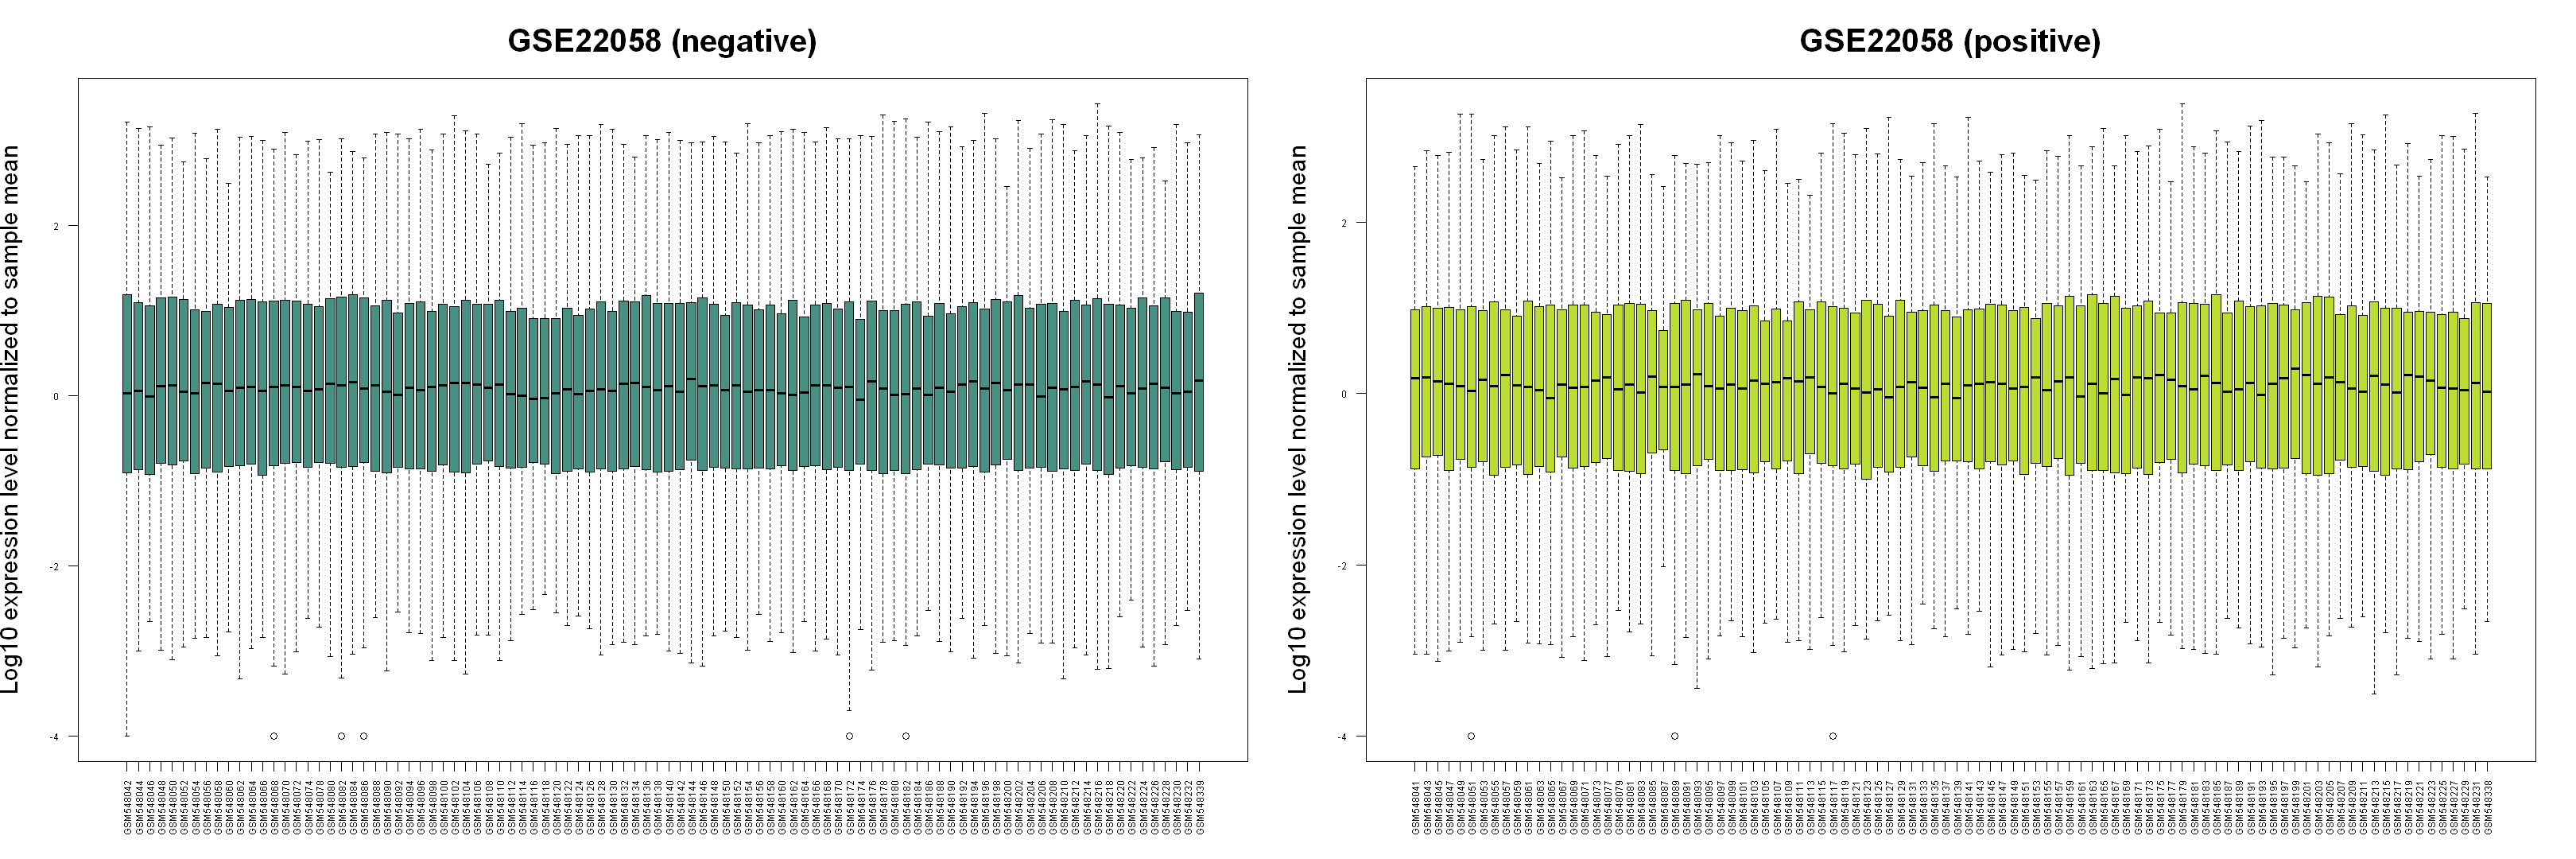

In [14]:
# show boxplot
#jpeg(file="GSE22058_pos_neg.jpeg", width=1500, height=500)
options(repr.plot.width=27, repr.plot.height=9)
lmts <- range(count.matrix.neg.f, count.matrix.pos.f)
par(mfrow = c(1, 2))
boxplot(count.matrix.neg.f, col = "#217867d2", cex.main=2, cex.lab=1.5, cex.axis=0.6, las = 2, main="GSE22058 (negative)", ylab="Log10 expression level normalized to sample mean")
boxplot(count.matrix.pos.f, col = "#aad400cd", cex.main=2, cex.lab=1.5, cex.axis=0.6, las = 2, main="GSE22058 (positive)", ylab="Log10 expression level normalized to sample mean")
#dev.off()

**Filter non-human and *-miRNAs (non dominant product)**

Note, in terms of *-miRNAs we remove all miRNAs that have * in their IDs. We do not screen the sequences against miRNA data bases. Please, prepare your own data accordingly to your needs.

In [15]:
#remove non-human miRNAs
count.matrix.f <- count.matrix.f[c(grep("hsa*", rownames(count.matrix.f))),]
non.human.data.row.numb <- nrow(count.matrix.f)
print(paste("Removed non-human features:", original.data.row.numb-non.human.data.row.numb))
print(paste("Number of features: ", non.human.data.row.numb))

#remove pre-miRNAs
count.matrix.f <- count.matrix.f[c(-grep("\\*", rownames(count.matrix.f))),]
print(paste("Removed * features:", non.human.data.row.numb-nrow(count.matrix.f)))
print(paste("Number of features: ", nrow(count.matrix.f)))

#separate into negative and positive samples
count.matrix.neg.f <- count.matrix.f[,1:length(colnames(count.matrix.neg.f))]
count.matrix.pos.f <- count.matrix.f[,(length(colnames(count.matrix.neg.f))+1):length(colnames(count.matrix.f))]

[1] "Removed non-human features: 0"
[1] "Number of features:  220"
[1] "Removed * features: 10"
[1] "Number of features:  210"


**Show boxplot for all samples after filtering**

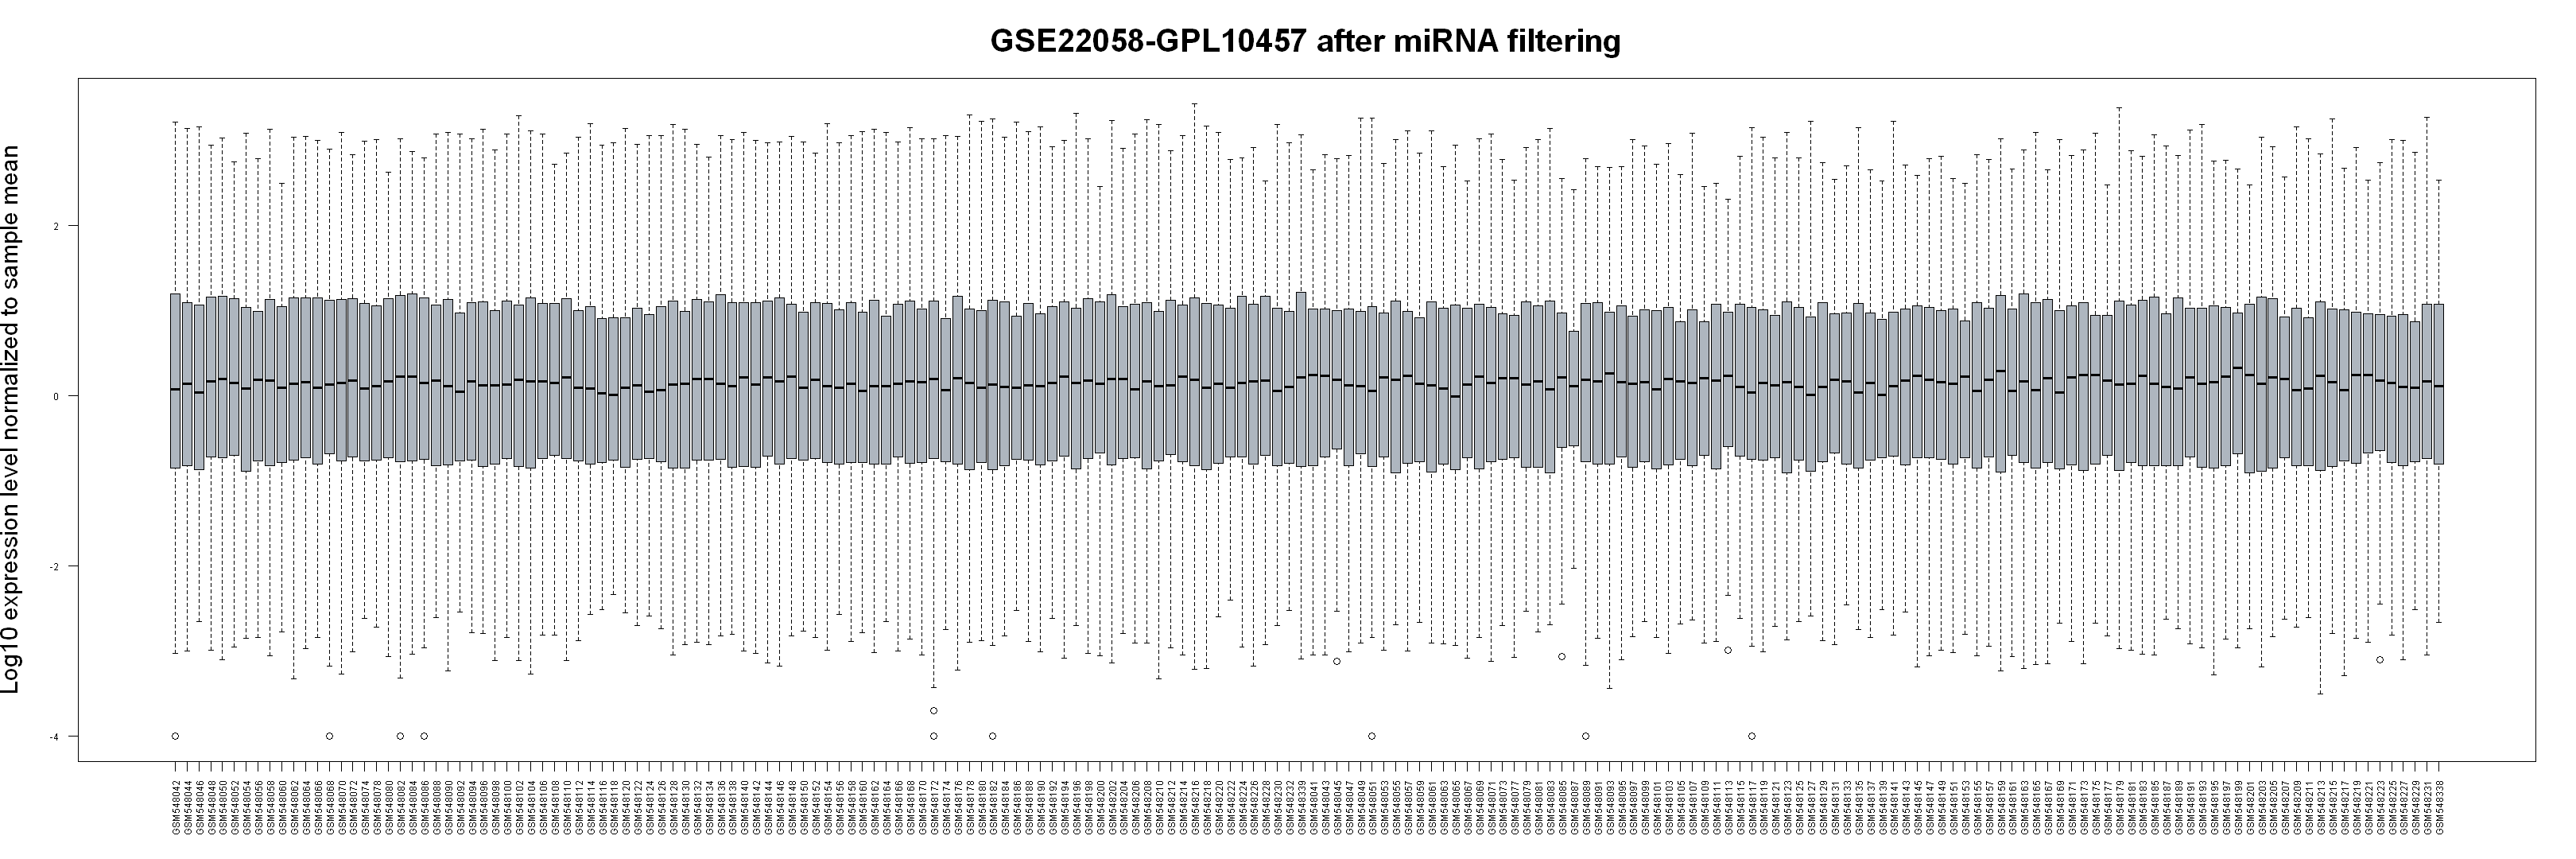

In [16]:
# show boxplot
#jpeg(file="GSE22058_all.jpeg", width=1500, height=500)
options(repr.plot.width=27, repr.plot.height=9)
boxplot(count.matrix.f, col = "#AEB6BF", cex.main=2, cex.lab=1.5, cex.axis=0.6, las = 2, main="GSE22058-GPL10457 after miRNA filtering", ylab="Log10 expression level normalized to sample mean")
#dev.off()

**Show boxplots for positive and negative samples separately after filtering**

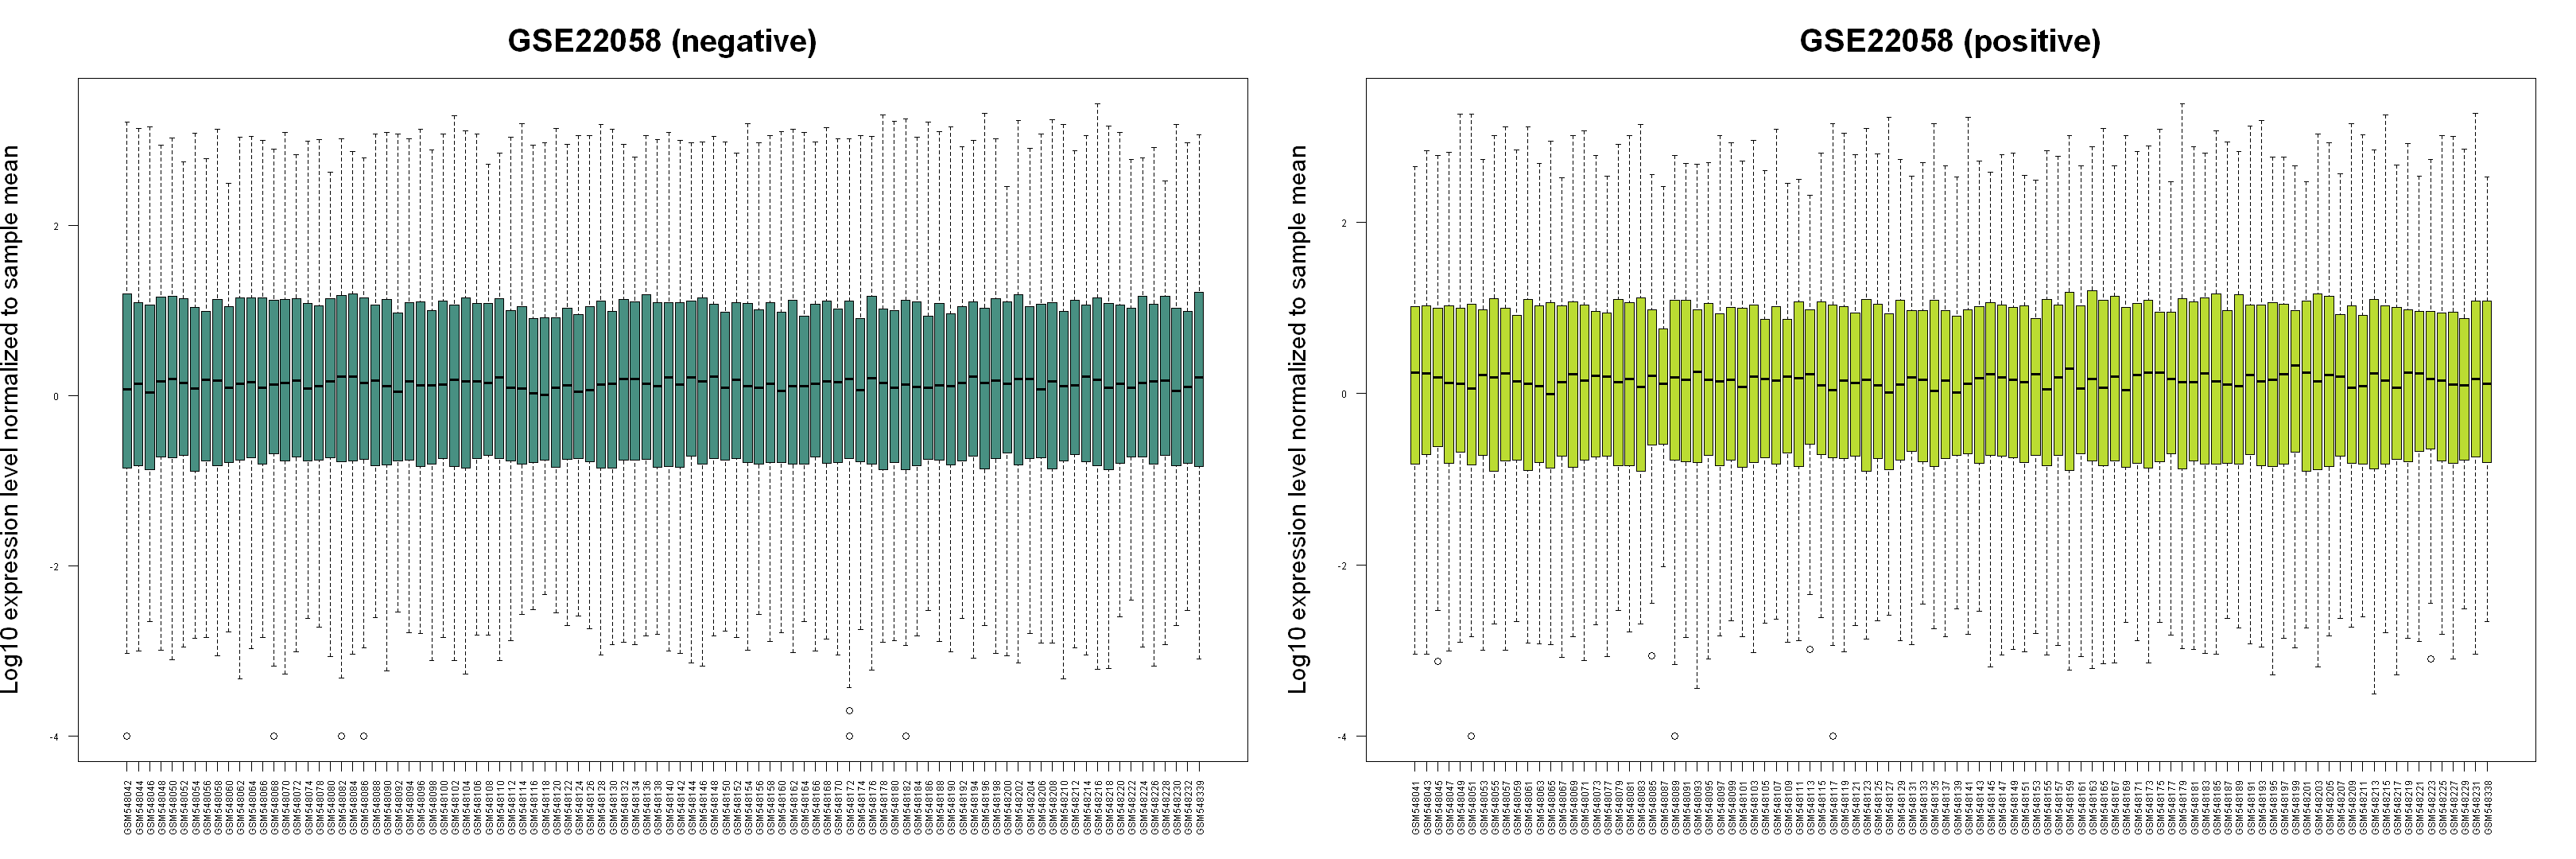

In [17]:
# show boxplot
#jpeg(file="GSE22058_pos_neg.jpeg", width=1500, height=500)
options(repr.plot.width=27, repr.plot.height=9)
lmts <- range(count.matrix.neg.f, count.matrix.pos.f)
par(mfrow = c(1, 2))
boxplot(count.matrix.neg.f, col = "#217867d2", cex.main=2, cex.lab=1.5, cex.axis=0.6, las = 2, main="GSE22058 (negative)", ylab="Log10 expression level normalized to sample mean")
boxplot(count.matrix.pos.f, col = "#aad400cd", cex.main=2, cex.lab=1.5, cex.axis=0.6, las = 2, main="GSE22058 (positive)", ylab="Log10 expression level normalized to sample mean")
#dev.off()

**Format data and save as .csv**

In [18]:
# format data
original_ids <- colnames(count.matrix.f)
new_ids <- seq(1,length(colnames(count.matrix.f)),1)
sample.info <- data.frame(original_ids,new_ids,annotation)
write.table(sample.info, paste("GSE22058", "_sample_info.csv", sep=""),  sep = ";", row.names = FALSE, quote=FALSE)
colnames(count.matrix.f) <- seq(1,length(colnames(count.matrix.f)),1)

transformed.data.set <- transform_data(annotation, count.matrix.f)
head(transformed.data.set)

data.set.name = paste("GSE22058", ".csv", sep="", collapse = NULL)

write.table(transformed.data.set, data.set.name,  sep = ";", row.names = FALSE, quote=FALSE)

ID,Annots,hsa-let-7a,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f,hsa-let-7g,hsa-let-7i,...,hsa-mir-452,hsa-mir-7,hsa-mir-9,hsa-mir-92,hsa-mir-93,hsa-mir-95,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
1,0,2.186,2.111,1.8772,2.0204,1.9329,2.2413,1.9781,1.2371,...,-0.5314,0.622,-0.3743,1.6419,0.4732,-0.5189,-1.1217,0.3618,1.7695,-0.1284
2,0,2.1915,2.108,1.9446,1.9322,1.8191,2.0943,1.8762,1.2286,...,-0.6238,0.6986,-0.569,1.5817,0.4335,-0.4636,-0.9704,0.278,1.6633,-0.1929
3,0,2.2737,2.0104,1.8981,2.0261,1.9377,2.3039,2.0149,1.1961,...,-0.4265,0.8638,-0.72,1.5974,0.4322,-0.36,-0.8065,0.2198,1.6883,-0.2929
4,0,2.1323,2.0735,1.8247,1.8523,1.9132,2.2299,1.9529,1.3639,...,-0.5261,0.7846,-0.577,1.3925,0.4415,-0.403,-0.7247,0.1994,1.6077,0.0409
5,0,2.2068,2.1514,1.8766,1.9446,1.967,2.0062,1.889,1.4003,...,-0.5316,0.6757,-0.6528,1.4884,0.5472,-0.2901,-0.3444,0.4033,1.7261,-0.0338
6,0,2.185,2.1115,1.8108,1.9386,1.9253,1.9667,1.8272,1.3431,...,-0.6569,0.7257,-0.6779,1.3722,0.4922,-0.3695,-0.4407,0.2385,1.4474,0.0511
